# AirBnB "Listings" Dataset for New York City

##    

## 1. Business Understanding

The travel accommodation website airbnb.com is a crowd-sourced marketplace where hosts living in various cities across the globe can offer rooms or entire apartments/houses/condos to visitors of their respective city at various rates and number of nights. The data that airbnb has collected and made publicly available primarily revolve around an individual listing as well as review information for the specific listing. The attributes airbnb has captured within their dataset allows users of the data to identify and even predict certain trends based on the information provided within the listings as well as the user-sourced review information for either the host or the liting itself. Because of its size, the team will be currently focused on the city of New York with the potential to include other cities for future assignments for more advanced analysis.

From a prediction perspective, there are several avenues the team could possibly focus on. For example, a classification analysis can be performed (specifically Linear Discriminatory Analysis) focused on an individual host and whether or no the host can be considered "popular" or "unpopular" based on several attributes, including but not limited to: average reviews per month, calculated number of host listings, number of reviews and price. Other predictive analyses that can be performed include mulitple linear regression with price as the response variable and utilizing both categorical and continuous features in order to predict what the average price should be for that particular listing. Features to use in the analysis would be: neighborhood, neighborhood group, room type, availability, and reviews per month.

From a utility perspective, providing an algorithm in order to predict a price as well as the popularity of a hosts' listing could provide an additional layer to users of the site to make better decisions around selecting a host to contact for future accommodations. A succesful linear regression model can display the predicted price based on the variables for a given listing and compare it to the actual listing price, which could potentially open up a more competitive landscape for the company at large and can be used in all other cities based on the model provided for the New York City dataset.


#### Importing the primary files and converting them into a pandas DataFrame

In [1]:
# import the modules as well as the primary files to load into DataFrames
import pandas as pd
import numpy as np
listNYC = pd.read_csv('airbnb_listings_NYC.csv', encoding = "ISO-8859-1") # read in the "listings" csv
reviewsNYC = pd.read_csv('airbnb_reviews_NYC.csv', encoding = "ISO-8859-1") # read in the "reviews" csv

The .csv files above that have been read into the Notebook will be used for several of the analyses moving forward. Anytime listNYC is used as the dataframe, it is referring to this source, which has removed specific outliers which is further detailed below.

#### Adding code to ensure "matplotlib" plots can be embedded into the Jupyter notebook

In [2]:
# this code snippet allows plots to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#### Adding code to include seaborn visualizations

In [3]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(color_codes=True)

## 2. Data and Attribute/Feature Description

Description of attributes for ListNYC dataset

In [4]:
listNYC_descriptions = pd.read_csv('listNYC_dataset_description.csv', encoding = "ISO-8859-1") 
listNYC_descriptions

,Attributes,Attribute Type,Description,Used in Analysis
0,id,Nominal,Unique ID of property listed on Airbnb,No
1,name,Text,Name of the property,No
2,host_id,Nominal,Unique ID of host who has listed the property,No
3,host_name,Text,Name of the host to,No
4,neighbourhood_group,Nominal / Categorical,City/Town as maintained by muncipalty. It help...,Yes
5,neighbourhood,Nominal / Text,Actual neighbourhood where property is located,TBD
6,latitude,Interval,Latitude on the map where property is located,TBD
7,longitude,Interval,Longitude on the map where property is located,TBD
8,room_type,Nominal / Categorical,"Category as Private or Shared Room, Entire home",Yes
9,price,Ratio,Price per day for renting the property,Yes


Description of attributes for reviewsNYC dataset

In [5]:
reviewsNYC_descriptions = pd.read_csv('reviewsNYC_dataset_description.csv', encoding = "ISO-8859-1") 
reviewsNYC_descriptions

,Attributes,Attribute Type,Description,Used in Analysis
0,listing_id,Nominal,Id of property being listed referring to the I...,TBD
1,id,Nominal,Unique ID of the review,TBD
2,date,Interval,Date when review was submitted,TBD
3,reviewer_id,Nominal,ID of reviewer,TBD
4,reviewer_name,Text,Reviewer Name,TBD
5,comments,Text,Comment/Review posted for specific property by...,TBD


## 3. Data Verification and Quality

Information will go here that will be provided by Matt.

## 4. Statistics Summary for Appropriate Features

Matt to provide code here.

## 5. Primary Attribute Visualization

Dividing data into groups so visualization can be presented for each type of group

In [6]:
#Defining data into group as continuous, ordinal and category to use later
continuous_features = ['price','latitude','longitude','reviews_per_month','calculated_host_listings_count','number_of_reviews']
ordinal_features = ['minimum_nights','availability_365']
categ_features = ['neighbourhood_group','neighbourhood','room_type']

For categorical variables, following table represent high level information 

In [7]:
listNYC[categ_features].describe()

,neighbourhood_group,neighbourhood,room_type
count,32546,32546,32546
unique,5,210,3
top,Manhattan,Williamsburg,Entire home/apt
freq,16585,2574,17051


From the tabel above it is clear that Manhattan is the top neighbourhood_group associated with listed properties. Similarly room_type as 'Entire home/apt' is most commonly listed property type.

Since Manahattan came out as the top neighbourhood_group, we can see some more detail about different neighbourhoods in this group

In [8]:
listNYC_Manhattan = listNYC[(listNYC.neighbourhood_group == 'Manhattan')]
listNYC_Manhattan_ngrouped = listNYC_Manhattan.groupby(by=['neighbourhood'])

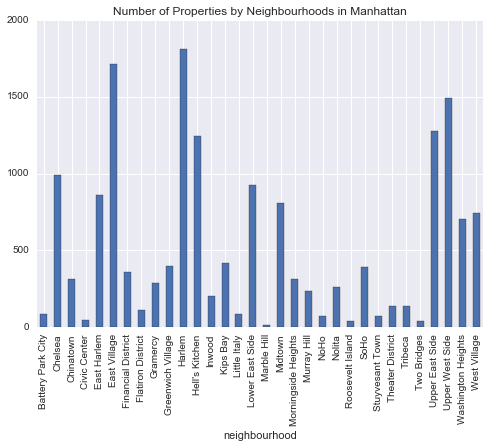

In [9]:
listNYC_Manhattan_ngrouped.id.count().plot(kind='bar', title='Number of Properties by Neighbourhoods in Manhattan') 

Since Williamsburg has come on top of the list of neighbourhoods with most properties listed, we will summarize the room_type data for Williamsburg

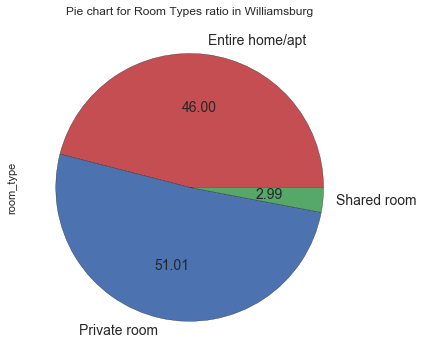

In [10]:
listNYC_Williamsburg = listNYC[(listNYC.neighbourhood == 'Williamsburg')]
listNYC_Williamsburg_rgrouped = listNYC_Williamsburg.groupby(by=['room_type'])
room_types = listNYC_Williamsburg.room_type.unique()
listNYC_Williamsburg_rgrouped.room_type.count().plot.pie(labels=room_types
                                                         ,colors=['r','b','g']
                                                         ,autopct='%.2f'
                                                         ,fontsize=14
                                                         ,figsize=(6,6)
                                                         ,title='Pie chart for Room Types ratio in Williamsburg' )

Now we will review some ordinal data: minimum night requirement <= 30 days

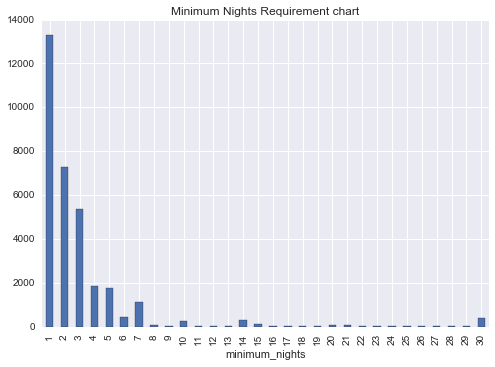

In [29]:
listNYC_Min_Nights = listNYC[(listNYC.minimum_nights <= 30)].groupby(by=['minimum_nights'])
listNYC_Min_Nights.minimum_nights.count().plot(kind='bar', title='Minimum Nights Requirement chart')

From the chart 'Minimum Night Requirement' it is evident that most properties are available for 1 night minimum night requirement. However, there are also properties with weekly, bi-weekly and monthly minimum night requirement.

For continuous variables, lets review ratio between host and listed property as group of properites listed by same host/owner

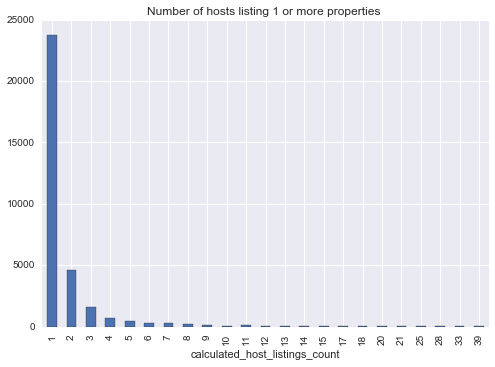

In [12]:
listNYC_hosts_group = listNYC.groupby(by=['calculated_host_listings_count'])
listNYC_hosts_group.id.count().plot(kind='bar',title='Number of hosts listing 1 or more properties ')

From the chart 'Number of hosts listing 1 or more properties' , it is obvious that most of the hosts have only one property listed on AirBnN. However there are some hosts with listed properties as many as 39. I assume that hosts with higher number of properties are agents/brokers who are renting multiple properties.

For market share of each neighbourhood_group, lets compare property listed in each neighbourhood_group

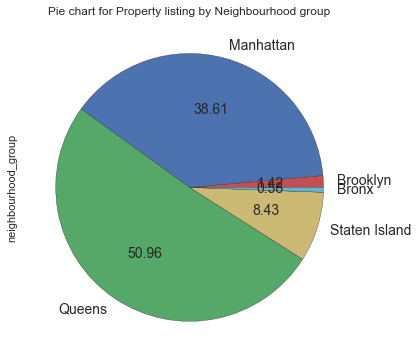

In [13]:
listNYC_ng_grouped = listNYC.groupby(by=['neighbourhood_group'])
ng_names = listNYC.neighbourhood_group.unique()
listNYC_ng_grouped.neighbourhood_group.count().plot.pie(labels=ng_names
                                                         ,colors=['r','b','g','y','c']
                                                         ,autopct='%.2f'
                                                         ,fontsize=14
                                                         ,figsize=(6,6)
                                                         ,title='Pie chart for Property listing by Neighbourhood group' )

Now analyze the price data

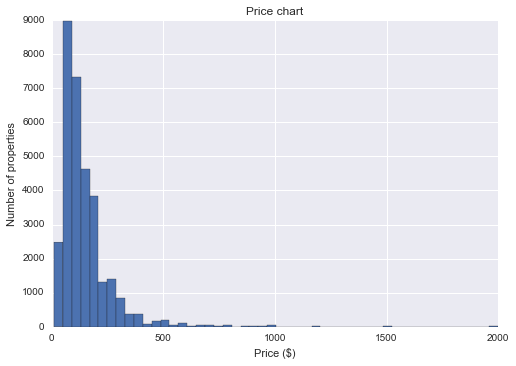

In [25]:
price_plot = listNYC['price'].hist(bins=50)
price_plot.set_title('Price per night chart')
price_plot.set_xlabel('Price ($)')
price_plot.set_ylabel('Number of properties')

It is evident that the there are some outliers in regards to price. Lets take out any record with price > 1000

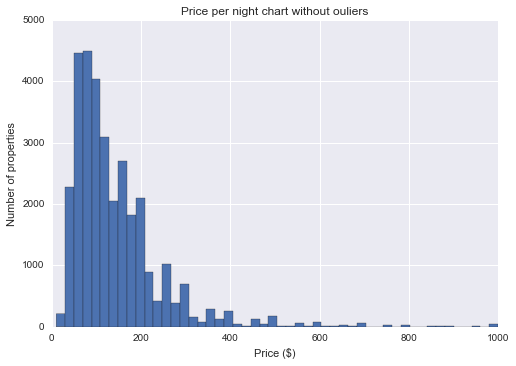

In [31]:
listNYC_wo_price_outliers = listNYC[(listNYC.price <= 1000)]
price_plot = listNYC_wo_price_outliers['price'].hist(bins=50)
price_plot.set_title('Price per night chart without ouliers')
price_plot.set_xlabel('Price ($)')
price_plot.set_ylabel('Number of properties')

From the price chart above, it is evident that most of the properties have nightly rate between 0 and 200.

## 6. Attribute Relationships and Visualizations

#### Scatter Plot of Price vs. Number of Reviews

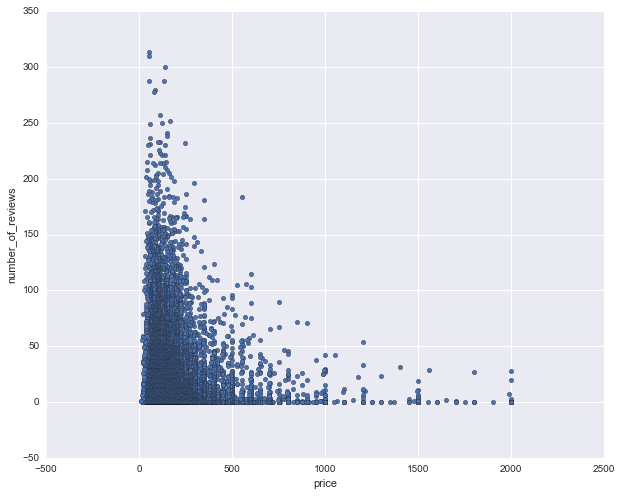

In [14]:
#scatter plot that observes the price of a listings vs. the number of reviews that listing has
listNYC.plot.scatter('price', 'number_of_reviews', s=None, c=None, figsize=(10,8))

At initial glance to the scatter plot above, it appears that the amount of reviews have more to do with the amount of listings that are in specific price ranges as opposed to the price of the listings alone. For example, even though there are limited listings that exceed $1,000, a decent portion of them have a review count that are greater than lower-priced listings. However, there are several higher-priced listings that have no reviews at all.

Furthermore, from a distribution standpoint, the vast majority of reviews occur at a price point of of $400 or less and a review count of less than 150, displaying a very sharp right-skewed scatter plot.

#### Create a new DataFrame that removes the IDs in order to focus on relationships between all other features

In [15]:
listNYC_noID = listNYC[['neighbourhood_group','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','calculated_host_listings_count']]

#### Create a scatterplot matrix that focuses on the features in the new DataFrame

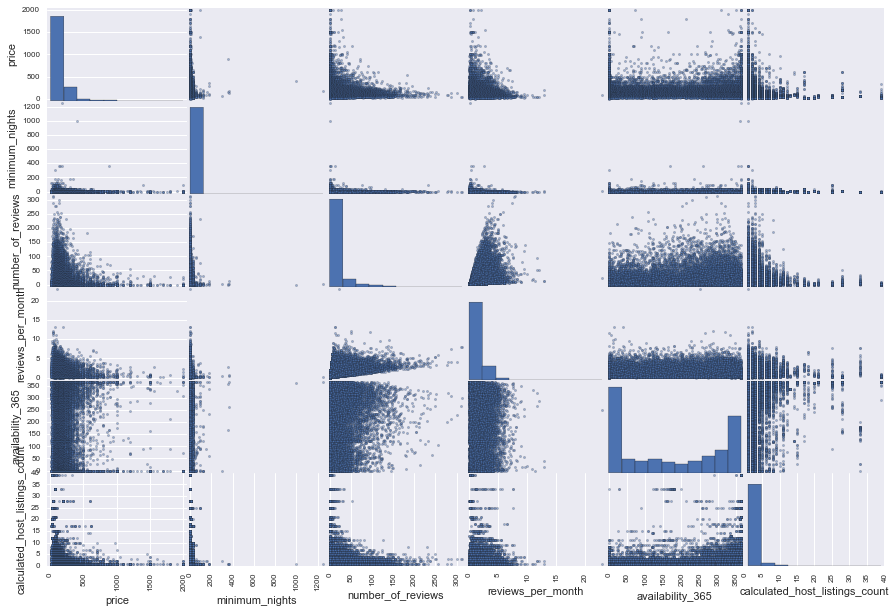

In [16]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(listNYC_noID,figsize=(15, 10))


Even though it was determined below that most of the relationships between certain variables can be considered "not significant", there are several interesting relationships worth discussing from the scatter matrix plot above.

When observing price specifically to other variables, it seems to have almost no effect on the availability of the listing on an annual basis (365 days), with the distribution not really increasing at all until it reaches approximately 250 days on average. Furthermore, a handful of inexpensive listings have hosts with more than 15 total listings; however, the higher the prices increase the less amount of overall listings a host tends to have.

#### Convert the above scatter matrix into a correlation plot using seaborn

C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


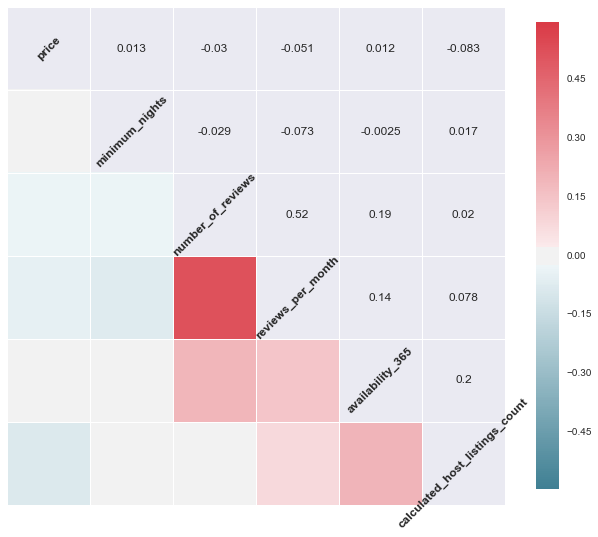

In [17]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.corrplot(listNYC_noID, 
             annot=True, # plot numeric annotations?
             sig_stars=True, # plot significance?
             diag_names=True, 
             cmap=cmap, 
             ax=ax)
f.tight_layout()

based on the visualization above, even though there seem to be some correlations between certain features, none of the relationships end up being considered "statisitically significant."  The only correlation that comes close is the Number of Reviews and the average number of Reviews Per Month, which makes sense because the stats being utilized have to do with review counts. 

Aside from the previously mentioned correlation, no other relations acquired a correlation greater than 0.2 (Availability 365 and the Calcualted Host Listings count). In terms of other features, surprisingly price seems to have little to no correlation with any of the other features, thus potentially showing that if a user is willing to pay the price for the listing, their reviews are based on the experience as opposed to how much the price was.

#### Create a cross-tab that looks at the count of listings by neighborhood group and the room type

In [18]:
RoomType_Hood = pd.crosstab(listNYC.neighbourhood_group, listNYC.room_type)
RoomType_Hood

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,139,289,34
Brooklyn,5931,6273,363
Manhattan,9927,6150,508
Queens,985,1620,138
Staten Island,69,118,2


#### Visualize the crosstab data into a vertical bar chart

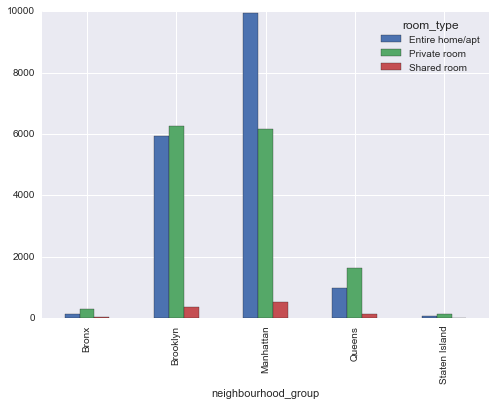

In [19]:
RoomType_Hood.plot(kind='bar')

Based on the bar chart above, it is by far no surprise that a majority of the listings are within the Manhattan burrough of NYC, with Brookyln not far off as the second-most listed burrough. That being said, Manhattan is surprisingly the only burrough where the room types offered are different versus all other burroughs; in Manhattan the number of entire home/apartment listings far exceeds the number of private or shared rooms, where all other burroughs the private room is the room type with the most amount of listings.

#### Create a box plot of all prices broken out by neighborhood group (burrough)

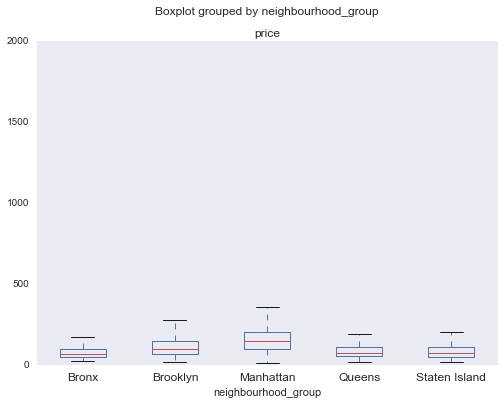

In [20]:
listNYC.boxplot(column='price', by='neighbourhood_group', ax=None, fontsize=None, rot=0, grid=False, figsize=(8,6), layout=None, return_type=None)

The shortness of these box plots primarily goes to show that once you reach a certain price point, not only do the listings become sparse but the range between the actual prices increases as well. However, 95% of all listings tend to be lower than approximately $400. 

In terms of comparing price ranges between burroughs, Queens, Bronx and Staten Island share similar distributions, while Brooklyn's price distribution seems to lie between those three burroughs and Manhattan, whose distribution is the most widepsread of the burroughs.

## 7. Target Classification Relationships

## 8. Feature/Attribute Additions to Current Dataset

For future analysis, we have considered adding other cities into the dataset in order to perform comparative analyses between major destination cities. For example, including cities such as San Francisco, Chicago, Austin and Los Angeles could be added and compare the same variables to one another.

A feature that would be helpful to have within the dataset on the rating/review side would be more of a numerical or ordinal value that would coincide along with a user's overall review. That way, future analysis that would focus on classification or LDA would be potentially easier to produce an algorithm that is stronger than one without.

## 9. Additional/Exceptional Workspace